In [ ]:
pip install scikit-learn

In [ ]:
pip install yellowbrick

In [ ]:
pip install scipy

In [ ]:
pip install yellowbrick

In [ ]:
pip install sklearn

In [ ]:
pip install hazm

In [ ]:
pip install gensim

In [ ]:
pip install tqdm

In [ ]:
pip install bs4

In [ ]:
pip install selenium

In [1]:
import seaborn as sns

from yellowbrick.cluster import kelbow_visualizer, intercluster_distance
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# from .preprocess import *
from phase3.clustering import return_clustered_csv, kmeans, load_data, vectorize, get_res, grid_search, GMM, hierarchical

sns.set_theme()
sns.set_style("dark")

In [2]:
# loading data
data, major_labels, minor_labels = load_data(stem=False, lemmatize=True, remove_conjunctions=True)
tfidf, w2v = vectorize(data, w2v_options=dict(size=64, iter=128, min_count=2))
pca_tfidf = PCA(64, random_state=666).fit_transform(tfidf.toarray())

,algorithm,vectorization,purity,mutual_info,rand_index
0,Kmeans,tf-idf,0.426237,0.281543,0.067202
1,Kmeans,w2v,0.550159,0.363200,0.213985


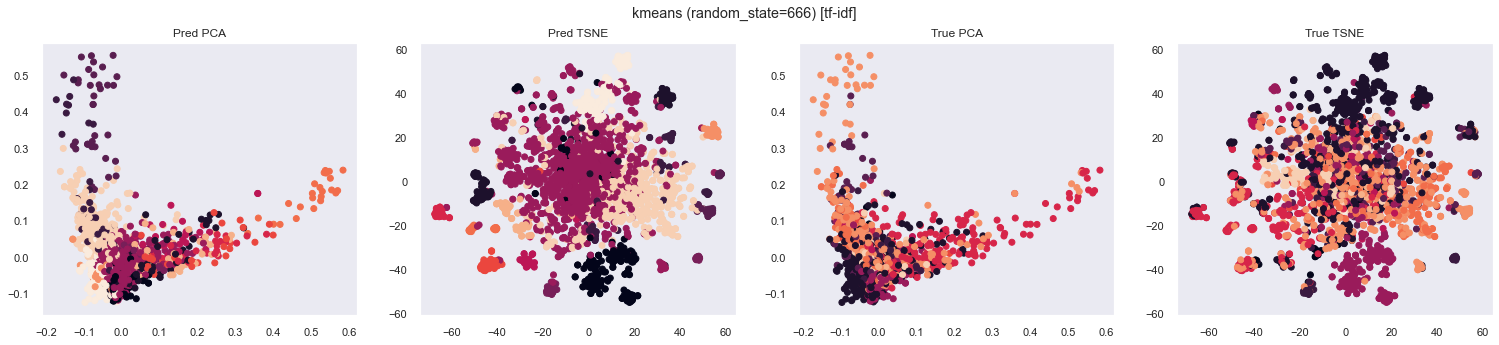

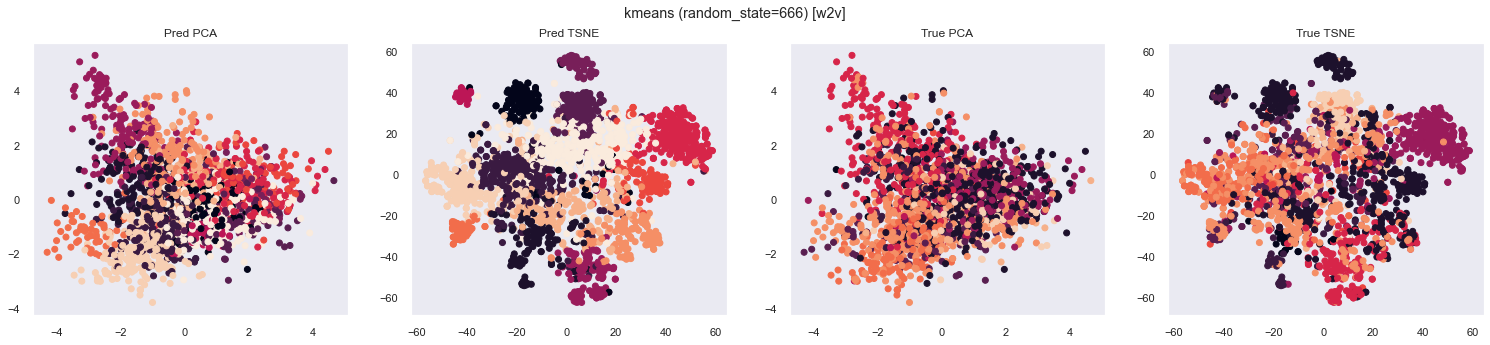

In [3]:
get_res(return_clustered_csv(data, kmeans, pca_tfidf, w2v, options=dict(random_state=666), save=True), data=data)

,algorithm,vectorization,purity,mutual_info,rand_index
0,Hierarchical,tf-idf,0.415797,0.256400,0.037530
1,Hierarchical,w2v,0.516114,0.315056,0.163183


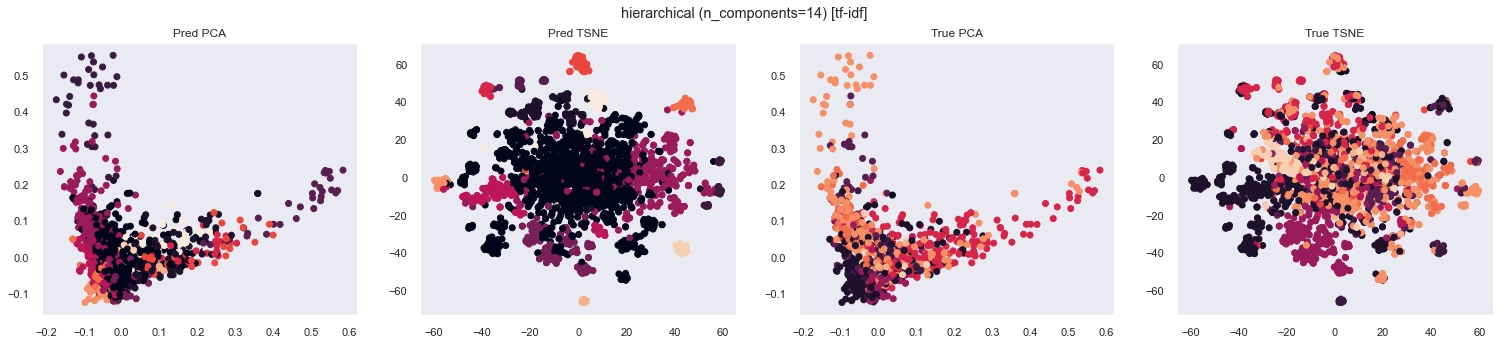

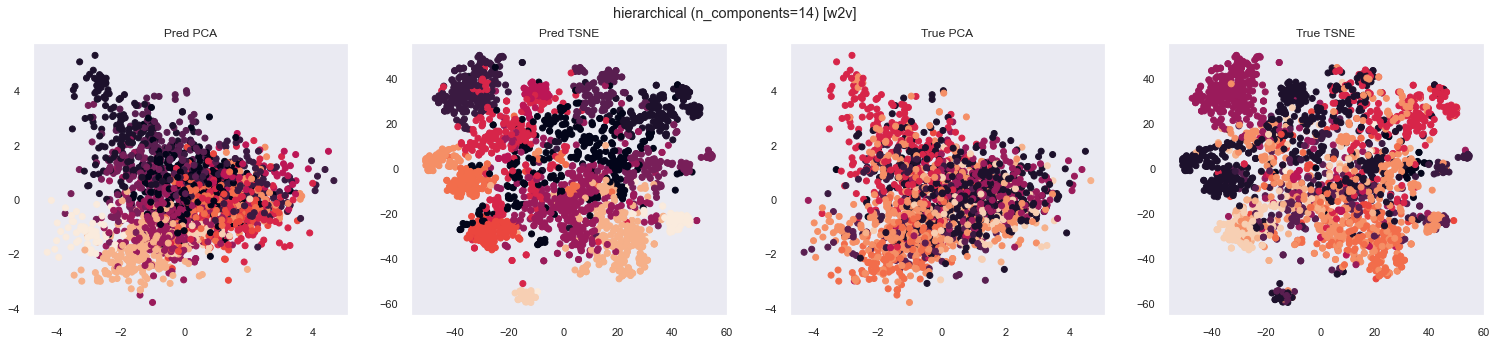

In [5]:
get_res(hier_res=return_clustered_csv(
    data,
    hierarchical,
    tfidf=pca_tfidf, w2v=w2v,
    options=dict(n_components=len(major_labels)),
    save=True), data=data)